# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [12]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [13]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


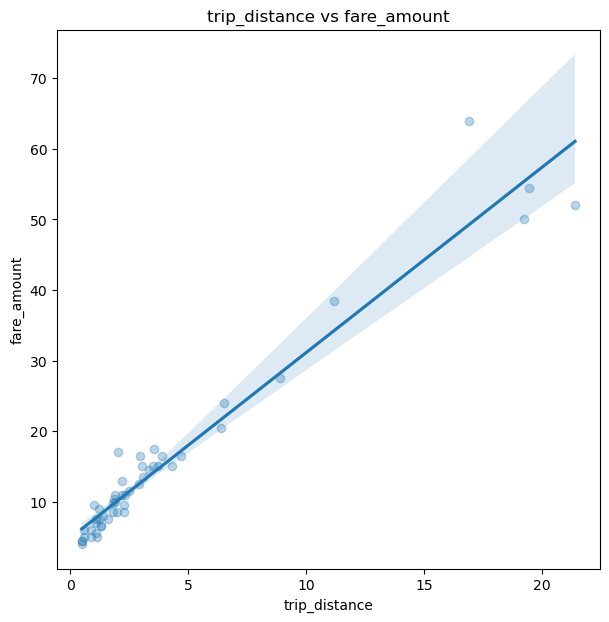

In [3]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

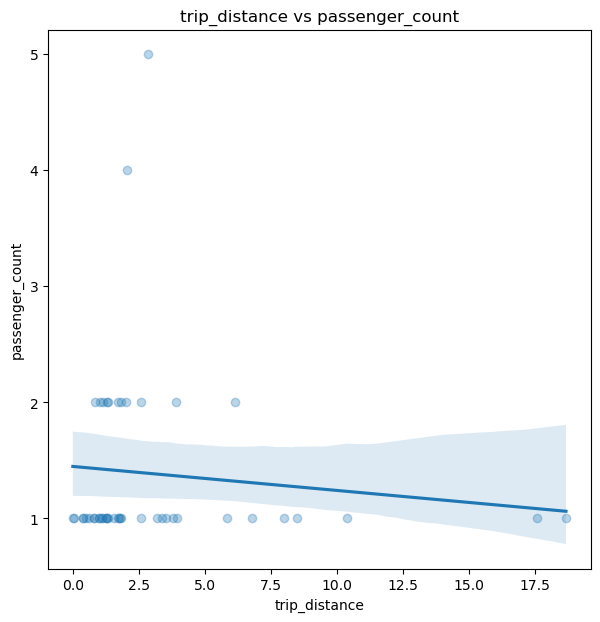

In [4]:
# trip distance vs passenger count.
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'passenger_count', 
    title = 'trip_distance vs passenger_count', 
    xlabel = 'trip_distance',
    ylabel = 'passenger_count',
)

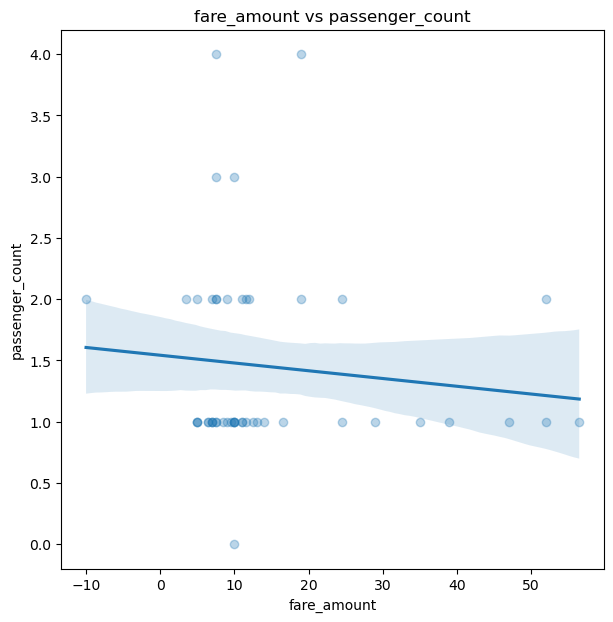

In [5]:
# Fare amount vs Passenger count
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'fare_amount', 
    y_col = 'passenger_count', 
    title = 'fare_amount vs passenger_count', 
    xlabel = 'fare_amount',
    ylabel = 'passenger_count',)

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [23]:
df_zones.head(25)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930
5,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,40.599062,-74.067774
6,0.107417,0.000390,Astoria,7,Queens,40.761085,-73.921491
7,0.027591,0.000027,Astoria Park,8,Queens,40.778607,-73.923202
8,0.099784,0.000338,Auburndale,9,Queens,40.754411,-73.788020
9,0.099839,0.000436,Baisley Park,10,Queens,40.678125,-73.791665


In [6]:
# Code for fetching the Kepler Map.
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [4]:
# Long/Lat for the pickup/dropoff zones 
data = pd.DataFrame({
    'latitude': [40.689516, 40.625724, 40.865888, 40.724152, 40.550340],
    'longitude': [-74.176786, -73.826126, -73.849479, -73.977023, -74.189930],
    'name': ['Newark', 'Jamaica Bay', 'Allerton/Pellham Gardens', 'Alphanet City', 'Arden Heights']
})

# Add data to the map
map_1.add_data(data, 'my_data')

In [ ]:
from keplergl import KeplerGl
import pandas as pd

# Create a new KeplerGl map
map_yellow_zones = KeplerGl()

# Load data into the map
map_yellow_zones.add_data(data=df_zones, name='Zones')
map_yellow_zones.add_data(data=df_yellow, name='Yellow Taxis')

# Match pickup locations with df_zones
pickup_locations = df_zones[df_zones['LocationID'].isin(df_yellow['PULocationID'])]

# Match dropoff locations with df_zones
dropoff_locations = df_zones[df_zones['LocationID'].isin(df_yellow['DOLocationID'])]

# Add pickup and dropoff locations with different colors
map_yellow_zones.add_data(data=pickup_locations, name='Pickup Locations', color='green')
map_yellow_zones.add_data(data=dropoff_locations, name='Dropoff Locations', color='blue')

# Display the map
map_yellow_zones


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [3]:
from keplergl import KeplerGl
import pandas as pd

# Create a new KeplerGl map
map_1 = KeplerGl()

# Load the DataFrame with latitudes and longitudes (df_zones)
# Assuming the latitude column is named 'lat' and longitude column is named 'lng'
data = df_zones[['lat', 'lng']].copy()

# Add data to the map
map_1.add_data(data, 'my_data')

# Display the map
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'my_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [5]:
# Write your code
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

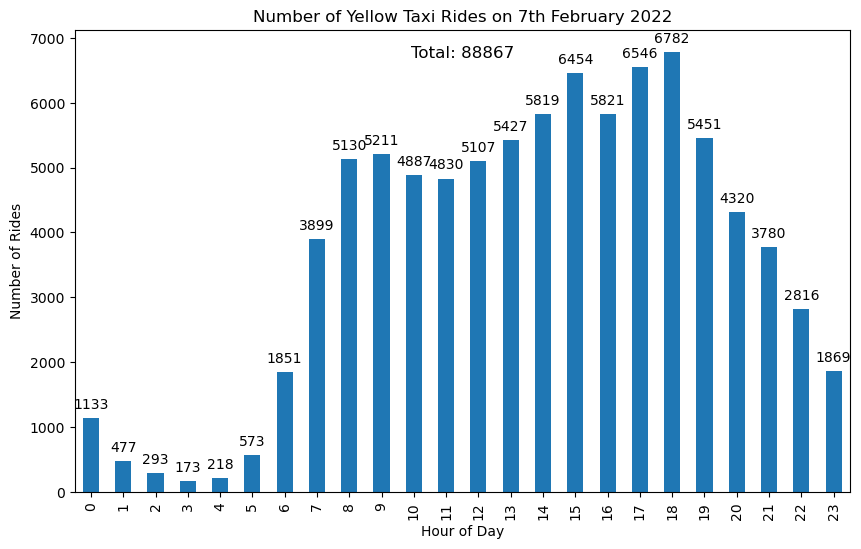

In [55]:
#Number of yellow taxi trips for a given day pr hour.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df_yellow' with a column 'tpep_pickup_datetime' representing the pickup dates of taxi trips

# Convert the 'tpep_pickup_datetime' column to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Filter the dataframe to include only the data for the 7th of February 2022
filtered_data = df_yellow[df_yellow['tpep_pickup_datetime'].dt.date == pd.to_datetime('2022-02-07').date()]

# Group the data by the hour of the day and calculate the total number of taxi trips for each hour
grouped_data = filtered_data['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Calculate the sum of trips for the whole day
total_trips = grouped_data.sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Yellow Taxi Rides on 7th February 2022')

# Add text annotations for the sum values on each bar
for i, count in enumerate(grouped_data):
    ax.text(i, count + 100, str(count), ha='center', va='bottom')

# Add a text annotation for the total number of trips
ax.text(0.5, 0.95, f'Total: {total_trips}', ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()


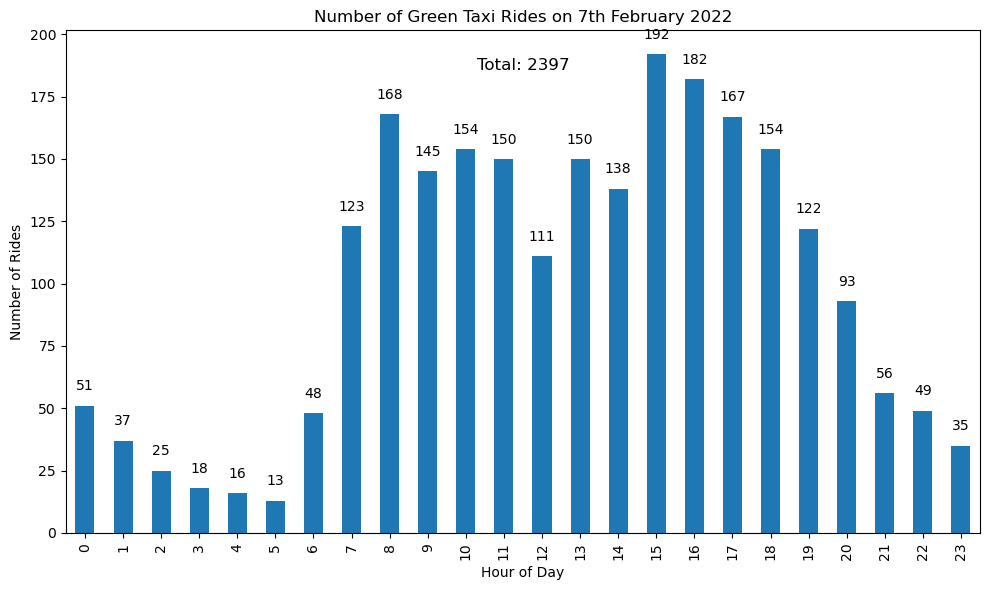

In [60]:
#Number of green taxi trips for a given day pr hour.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df_green' with a column 'lpep_pickup_datetime' representing the pickup dates of green taxi trips

# Convert the 'lpep_pickup_datetime' column to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Filter the dataframe to include only the data for the 7th of February 2022
filtered_data = df_green[df_green['lpep_pickup_datetime'].dt.date == pd.to_datetime('2022-02-07').date()]

# Group the data by the hour of the day and calculate the total number of taxi trips for each hour
grouped_data = filtered_data['lpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Calculate the sum of trips for the whole day
total_trips = grouped_data.sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Green Taxi Rides on 7th February 2022')

# Add text annotations for the sum values on each bar
for i, count in enumerate(grouped_data):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

# Add a text annotation for the total number of trips
ax.text(0.5, 0.93, f'Total: {total_trips}', ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()


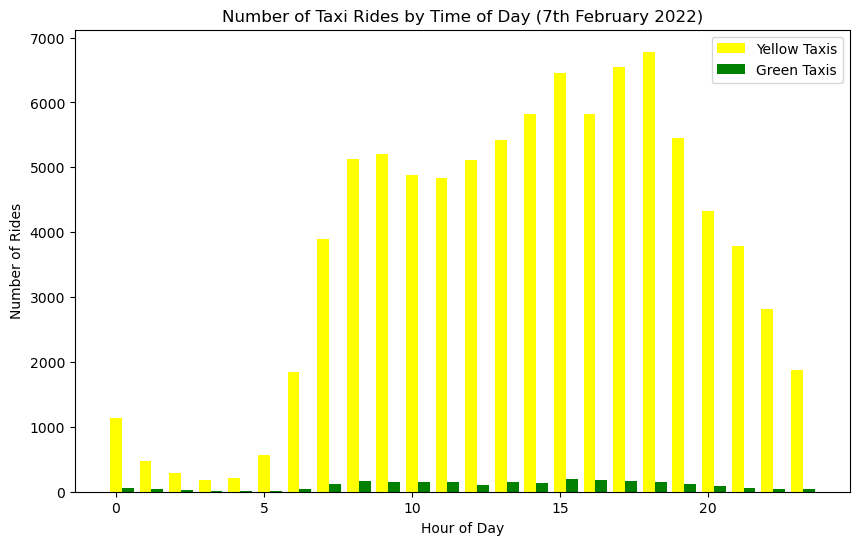

In [63]:
#Difference between yellow and green taxi trips, for a specific day pr hour.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames called 'df_yellow' and 'df_green' with columns 'tpep_pickup_datetime' and 'lpep_pickup_datetime' representing the pickup dates of taxi trips respectively

# Convert the 'tpep_pickup_datetime' column of df_yellow to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Convert the 'lpep_pickup_datetime' column of df_green to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Filter the dataframes to include only the data for the 7th of February 2022
df_yellow_filtered = df_yellow[df_yellow['tpep_pickup_datetime'].dt.date == pd.to_datetime('2022-02-07').date()]
df_green_filtered = df_green[df_green['lpep_pickup_datetime'].dt.date == pd.to_datetime('2022-02-07').date()]

# Group the data by the hour of the day and calculate the total number of taxi trips for each hour for yellow taxis
grouped_data_yellow = df_yellow_filtered['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Group the data by the hour of the day and calculate the total number of taxi trips for each hour for green taxis
grouped_data_green = df_green_filtered['lpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Create a list of hours
hours = grouped_data_yellow.index.tolist()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.4

# Plot the bars for yellow taxis with yellow color
ax.bar(hours, grouped_data_yellow, width=bar_width, align='center', color='yellow', label='Yellow Taxis')

# Plot the bars for green taxis shifted by the bar width to align them next to the yellow taxis, with green color
ax.bar([hour + bar_width for hour in hours], grouped_data_green, width=bar_width, align='center', color='green', label='Green Taxis')

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Taxi Rides by Time of Day (7th February 2022)')
ax.legend()

plt.show()


In [66]:
#Ammount of yellow and green taxi trips pr day. from 7th of February 2022 to 14th of february 2022

import pandas as pd

# Assuming you have DataFrames called 'df_yellow' and 'df_green' with columns 'tpep_pickup_datetime' and 'lpep_pickup_datetime' representing the pickup dates of taxi trips for yellow and green taxis respectively

# Convert the 'tpep_pickup_datetime' column for yellow taxis to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Convert the 'lpep_pickup_datetime' column for green taxis to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Convert the start and end dates to datetime objects
start_date = pd.to_datetime('2022-02-07')
end_date = pd.to_datetime('2022-02-14')

# Filter the yellow taxi dataframe to include only the data between the specified dates
yellow_filtered_data = df_yellow[
    (df_yellow['tpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_yellow['tpep_pickup_datetime'].dt.date <= end_date.date())
]

# Filter the green taxi dataframe to include only the data between the specified dates
green_filtered_data = df_green[
    (df_green['lpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_green['lpep_pickup_datetime'].dt.date <= end_date.date())
]

# Group the yellow taxi data by the date and calculate the total number of taxi trips for each day
yellow_grouped_data = yellow_filtered_data.groupby(yellow_filtered_data['tpep_pickup_datetime'].dt.date).size()

# Group the green taxi data by the date and calculate the total number of taxi trips for each day
green_grouped_data = green_filtered_data.groupby(green_filtered_data['lpep_pickup_datetime'].dt.date).size()

# Iterate over the dates from start_date to end_date
current_date = start_date
while current_date <= end_date:
    yellow_trips = yellow_grouped_data.get(current_date.date(), 0)
    green_trips = green_grouped_data.get(current_date.date(), 0)
    print(f"Date: {current_date.date()}, Yellow Taxi Trips: {yellow_trips}, Green Taxi Trips: {green_trips}")
    current_date += pd.Timedelta(days=1)



Date: 2022-02-07, Yellow Taxi Trips: 88867, Green Taxi Trips: 2397
Date: 2022-02-08, Yellow Taxi Trips: 102781, Green Taxi Trips: 2426
Date: 2022-02-09, Yellow Taxi Trips: 106089, Green Taxi Trips: 2506
Date: 2022-02-10, Yellow Taxi Trips: 112804, Green Taxi Trips: 2637
Date: 2022-02-11, Yellow Taxi Trips: 117752, Green Taxi Trips: 2787
Date: 2022-02-12, Yellow Taxi Trips: 119684, Green Taxi Trips: 2512
Date: 2022-02-13, Yellow Taxi Trips: 93022, Green Taxi Trips: 1764
Date: 2022-02-14, Yellow Taxi Trips: 110542, Green Taxi Trips: 2770


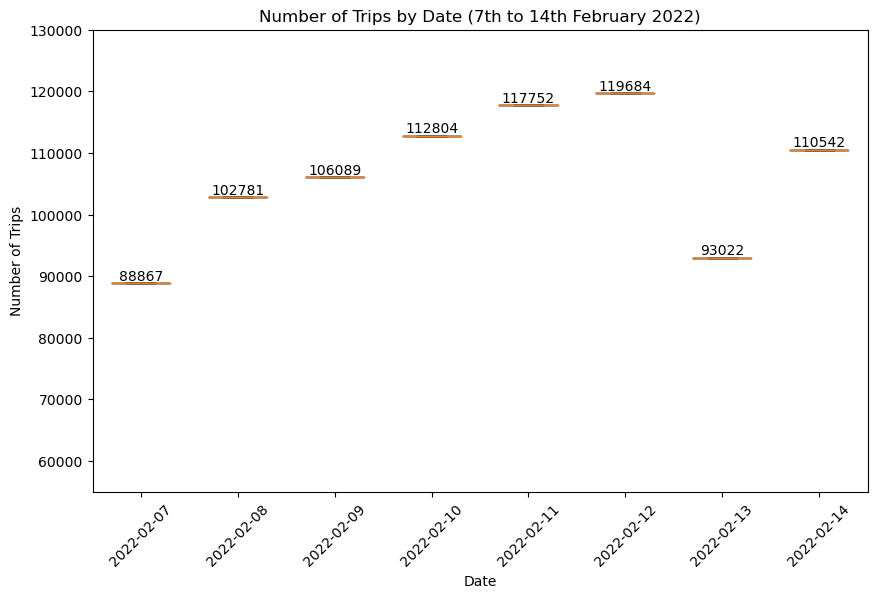

In [53]:
#Number of Yellow Taxi Trips by Date (7th to 14th February 2022.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df_yellow' with a column 'tpep_pickup_datetime' representing the pickup dates of taxi trips

# Convert the 'tpep_pickup_datetime' column to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Convert the start and end dates to datetime objects
start_date = pd.to_datetime('2022-02-07')
end_date = pd.to_datetime('2022-02-14')

# Filter the dataframe to include only the data between the specified dates
filtered_data = df_yellow[
    (df_yellow['tpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_yellow['tpep_pickup_datetime'].dt.date <= end_date.date())
]

# Group the data by the date and calculate the total number of taxi trips for each day
grouped_data = filtered_data.groupby(filtered_data['tpep_pickup_datetime'].dt.date).size()

# Create a list of dates and trip counts
dates = grouped_data.index.tolist()
trip_counts = grouped_data.tolist()

# Create positions for the boxplots
positions = range(1, len(dates) + 1)

# Create a boxplot for each date
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list of trip count lists for each date
trip_counts_list = [[count] for count in trip_counts]

# Plot the boxplots
boxplot = ax.boxplot(trip_counts_list, positions=positions, widths=0.6, showfliers=False)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Number of Trips by Date (7th to 14th February 2022)')

# Customize the y-axis limits
ax.set_ylim(55000, 130000)

ax.set_xticks(positions)
ax.set_xticklabels(dates, rotation=45)

# Add text annotations for the exact count on each boxplot
for i, box in enumerate(boxplot['boxes']):
    count = trip_counts[i]
    ax.text(positions[i], count, str(count), ha='center', va='bottom')

plt.show()


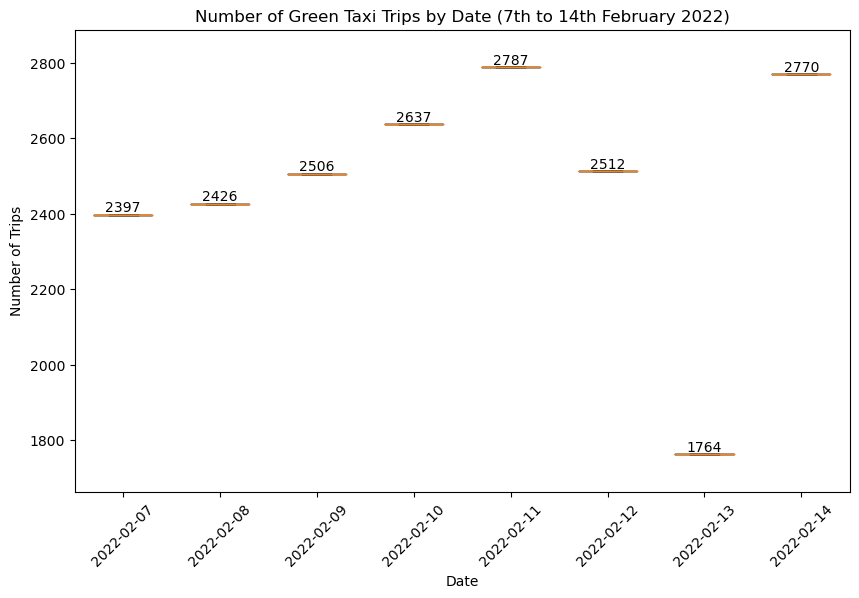

In [64]:
#Number of Green Taxi Trips by Date (7th to 14th February 2022.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df_green' with a column 'lpep_pickup_datetime' representing the pickup dates of green taxi trips

# Convert the 'lpep_pickup_datetime' column to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Convert the start and end dates to datetime objects
start_date = pd.to_datetime('2022-02-07')
end_date = pd.to_datetime('2022-02-14')

# Filter the dataframe to include only the data between the specified dates
filtered_data = df_green[
    (df_green['lpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_green['lpep_pickup_datetime'].dt.date <= end_date.date())
]

# Group the data by the date and calculate the total number of taxi trips for each day
grouped_data = filtered_data.groupby(filtered_data['lpep_pickup_datetime'].dt.date).size()

# Create a list of dates and trip counts
dates = grouped_data.index.tolist()
trip_counts = grouped_data.tolist()

# Create positions for the boxplots
positions = range(1, len(dates) + 1)

# Create a boxplot for each date
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list of trip count lists for each date
trip_counts_list = [[count] for count in trip_counts]

# Plot the boxplots
boxplot = ax.boxplot(trip_counts_list, positions=positions, widths=0.6, showfliers=False)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Number of Green Taxi Trips by Date (7th to 14th February 2022)')

# Automatically adjust the y-axis limits
ax.set_ylim(bottom=min(trip_counts) - 100, top=max(trip_counts) + 100)

ax.set_xticks(positions)
ax.set_xticklabels(dates, rotation=45)

# Add text annotations for the exact count on each boxplot
for i, box in enumerate(boxplot['boxes']):
    count = trip_counts[i]
    ax.text(positions[i], count, str(count), ha='center', va='bottom')

plt.show()


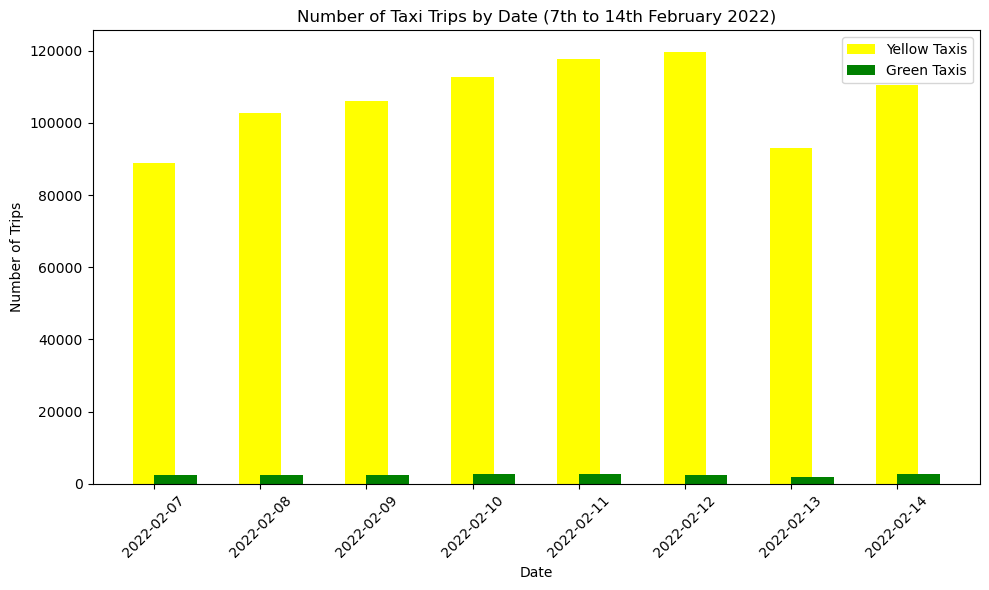

In [65]:
#Difference between Yellow and Green Taxis, pr day from the 7th of february 2022 to the 14th of february 2022

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames called 'df_yellow' and 'df_green' with columns 'tpep_pickup_datetime' and 'lpep_pickup_datetime' representing the pickup dates of taxi trips for yellow and green taxis respectively

# Convert the 'tpep_pickup_datetime' column for yellow taxis to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Convert the 'lpep_pickup_datetime' column for green taxis to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Convert the start and end dates to datetime objects
start_date = pd.to_datetime('2022-02-07')
end_date = pd.to_datetime('2022-02-14')

# Filter the yellow taxi dataframe to include only the data between the specified dates
yellow_filtered_data = df_yellow[
    (df_yellow['tpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_yellow['tpep_pickup_datetime'].dt.date <= end_date.date())
]

# Filter the green taxi dataframe to include only the data between the specified dates
green_filtered_data = df_green[
    (df_green['lpep_pickup_datetime'].dt.date >= start_date.date()) &
    (df_green['lpep_pickup_datetime'].dt.date <= end_date.date())
]

# Group the yellow taxi data by the date and calculate the total number of taxi trips for each day
yellow_grouped_data = yellow_filtered_data.groupby(yellow_filtered_data['tpep_pickup_datetime'].dt.date).size()

# Group the green taxi data by the date and calculate the total number of taxi trips for each day
green_grouped_data = green_filtered_data.groupby(green_filtered_data['lpep_pickup_datetime'].dt.date).size()

# Create a list of dates and trip counts for yellow taxis
yellow_dates = yellow_grouped_data.index.tolist()
yellow_trip_counts = yellow_grouped_data.tolist()

# Create a list of dates and trip counts for green taxis
green_dates = green_grouped_data.index.tolist()
green_trip_counts = green_grouped_data.tolist()

# Create positions for the bar plots
positions = range(len(yellow_dates))

# Create a bar plot for yellow taxis
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, yellow_trip_counts, width=0.4, align='center', color='yellow', label='Yellow Taxis')

# Create a bar plot for green taxis
ax.bar(positions, green_trip_counts, width=0.4, align='edge', color='green', label='Green Taxis')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Number of Taxi Trips by Date (7th to 14th February 2022)')

ax.set_xticks(positions)
ax.set_xticklabels(yellow_dates, rotation=45)

ax.legend()

plt.tight_layout()
plt.show()


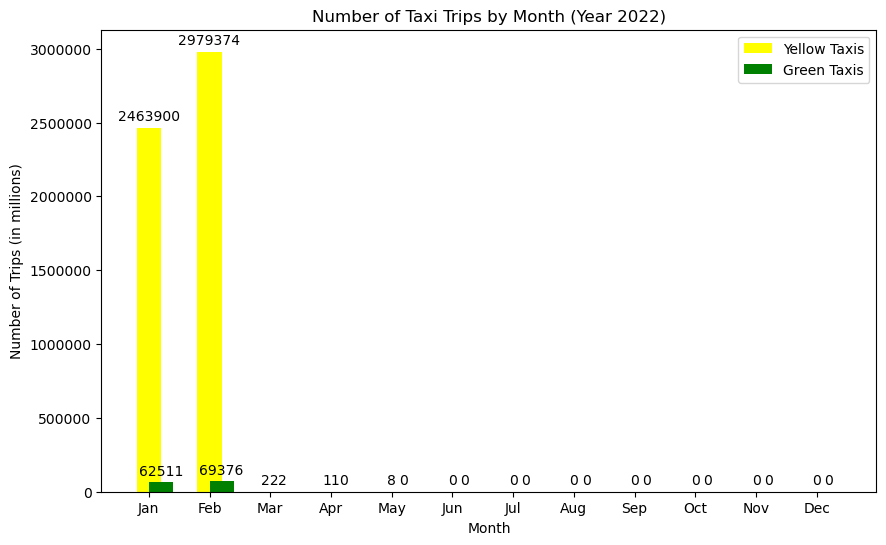

In [81]:
#Difference between Yellow and Green Taxis, pr month in 2022.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have DataFrames called 'df_yellow' and 'df_green' with columns 'tpep_pickup_datetime' and 'lpep_pickup_datetime' representing the pickup dates of taxi trips for yellow and green taxis respectively

# Convert the 'tpep_pickup_datetime' column for yellow taxis to a datetime type
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Convert the 'lpep_pickup_datetime' column for green taxis to a datetime type
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Filter the yellow taxi dataframe to include only the data for the year 2022
yellow_filtered_data = df_yellow[df_yellow['tpep_pickup_datetime'].dt.year == 2022]

# Filter the green taxi dataframe to include only the data for the year 2022
green_filtered_data = df_green[df_green['lpep_pickup_datetime'].dt.year == 2022]

# Group the yellow taxi data by the month and calculate the total number of taxi trips for each month
yellow_grouped_data = yellow_filtered_data.groupby(yellow_filtered_data['tpep_pickup_datetime'].dt.month).size()

# Group the green taxi data by the month and calculate the total number of taxi trips for each month
green_grouped_data = green_filtered_data.groupby(green_filtered_data['lpep_pickup_datetime'].dt.month).size()

# Create a list of months
months = pd.date_range(start='2022-01-01', end='2022-12-31', freq='M').strftime('%b')

# Fill missing months with zero values
all_months = np.arange(1, 13)
yellow_grouped_data = yellow_grouped_data.reindex(all_months, fill_value=0)
green_grouped_data = green_grouped_data.reindex(all_months, fill_value=0)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plots for yellow and green taxis
yellow_bars = ax.bar(months, yellow_grouped_data, width=0.4, align='center', label='Yellow Taxis', color='yellow')
green_bars = ax.bar(months, green_grouped_data, width=0.4, align='edge', label='Green Taxis', color='green')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Trips (in millions)')
ax.set_title('Number of Taxi Trips by Month (Year 2022)')
ax.legend()

ax.ticklabel_format(axis='y', style='plain')

# Add labels on top of each bar
for bar in yellow_bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

for bar in green_bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.show()


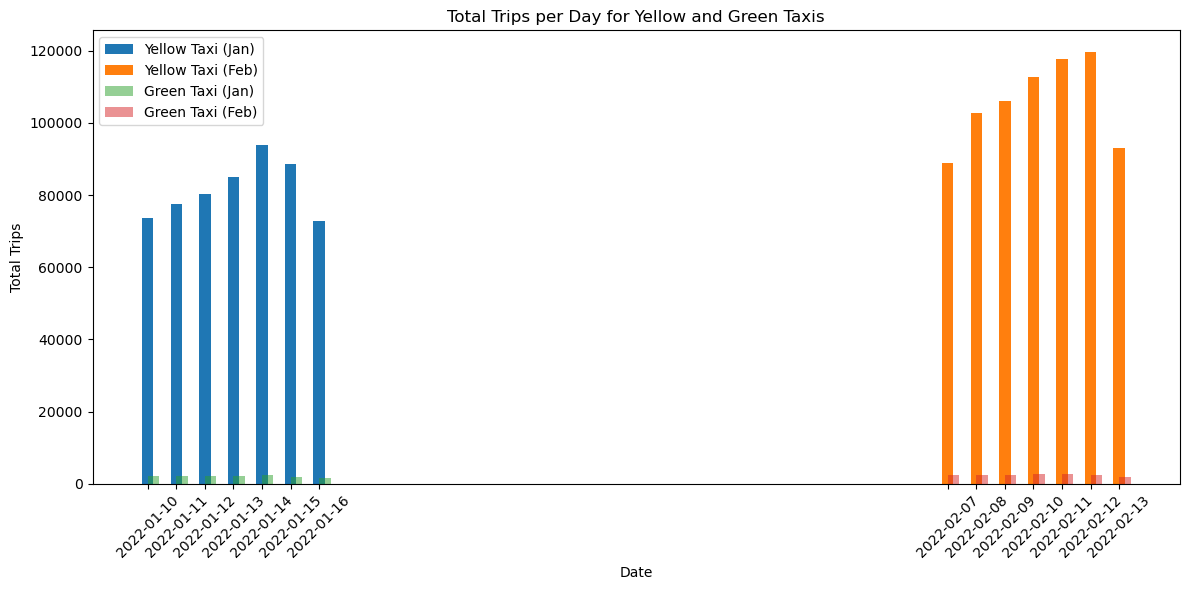

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframes based on the specified periods
start_date_1 = '2022-01-10'
end_date_1 = '2022-01-16'
start_date_2 = '2022-02-07'
end_date_2 = '2022-02-13'

df_yellow_filtered_1 = df_yellow[
    (df_yellow['tpep_pickup_datetime'].dt.floor('D') >= pd.Timestamp(start_date_1).floor('D')) &
    (df_yellow['tpep_pickup_datetime'].dt.floor('D') <= pd.Timestamp(end_date_1).floor('D'))
]

df_green_filtered_1 = df_green[
    (df_green['lpep_pickup_datetime'].dt.floor('D') >= pd.Timestamp(start_date_1).floor('D')) &
    (df_green['lpep_pickup_datetime'].dt.floor('D') <= pd.Timestamp(end_date_1).floor('D'))
]

df_yellow_filtered_2 = df_yellow[
    (df_yellow['tpep_pickup_datetime'].dt.floor('D') >= pd.Timestamp(start_date_2).floor('D')) &
    (df_yellow['tpep_pickup_datetime'].dt.floor('D') <= pd.Timestamp(end_date_2).floor('D'))
]

df_green_filtered_2 = df_green[
    (df_green['lpep_pickup_datetime'].dt.floor('D') >= pd.Timestamp(start_date_2).floor('D')) &
    (df_green['lpep_pickup_datetime'].dt.floor('D') <= pd.Timestamp(end_date_2).floor('D'))
]

# Calculate the total trips per day
yellow_trips_per_day_1 = df_yellow_filtered_1['tpep_pickup_datetime'].dt.date.value_counts().sort_index()
green_trips_per_day_1 = df_green_filtered_1['lpep_pickup_datetime'].dt.date.value_counts().sort_index()

yellow_trips_per_day_2 = df_yellow_filtered_2['tpep_pickup_datetime'].dt.date.value_counts().sort_index()
green_trips_per_day_2 = df_green_filtered_2['lpep_pickup_datetime'].dt.date.value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
x1 = pd.date_range(start_date_1, end_date_1, freq='D')
x2 = pd.date_range(start_date_2, end_date_2, freq='D')
width = 0.4

ax.bar(x1, yellow_trips_per_day_1, width=width, label='Yellow Taxi (Jan)', align='center')
ax.bar(x2, yellow_trips_per_day_2, width=width, label='Yellow Taxi (Feb)', align='center')

ax.bar(x1, green_trips_per_day_1, width=width, label='Green Taxi (Jan)', alpha=0.5, align='edge')
ax.bar(x2, green_trips_per_day_2, width=width, label='Green Taxi (Feb)', alpha=0.5, align='edge')

ax.set_xlabel('Date')
ax.set_ylabel('Total Trips')
ax.set_title('Total Trips per Day for Yellow and Green Taxis')
ax.legend()

ax.set_xticks(x1.union(x2))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()


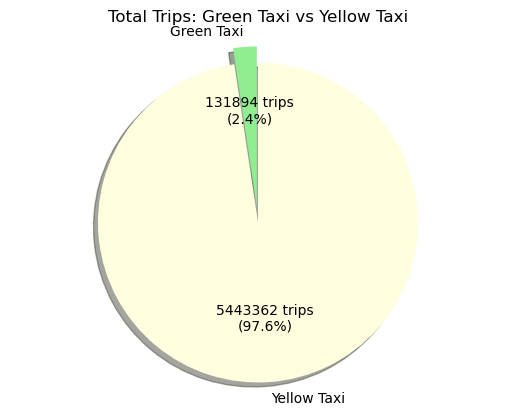

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the total trips for green and yellow taxis
total_green_trips = len(df_green)
total_yellow_trips = len(df_yellow)

# Calculate the percentages
total_trips = total_green_trips + total_yellow_trips
green_percentage = (total_green_trips / total_trips) * 100
yellow_percentage = (total_yellow_trips / total_trips) * 100

# Create a pie chart
labels = ['Green Taxi', 'Yellow Taxi']
sizes = [total_green_trips, total_yellow_trips]
colors = ['lightgreen', 'lightyellow']
explode = (0.1, 0)  # Explode the first slice

fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct='%1.1f%%', shadow=True, startangle=90)

# Add the count and percentage of trips as text inside each slice
for i, text in enumerate(autotexts):
    text.set_text(f'{sizes[i]} trips\n({autotexts[i].get_text()})')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Total Trips: Green Taxi vs Yellow Taxi')

plt.show()


In [128]:
num_pickup_places_yellow = len(df_yellow['PULocationID'].unique())
num_pickup_places_green = len(df_green['PULocationID'].unique())

print(f"There are {num_pickup_places_yellow} different pickup places for yellow taxis.")
print(f"There are {num_pickup_places_green} different pickup places for green taxis.")


There are 260 different pickup places for yellow taxis.
There are 248 different pickup places for green taxis.


In [30]:
num_dropoff_places_yellow = len(df_yellow['DOLocationID'].unique())
num_dropoff_places_green = len(df_green['DOLocationID'].unique())

print(f"There are {num_dropoff_places_yellow} different dropoff places for yellow taxis.")
print(f"There are {num_dropoff_places_green} different dropoff places for green taxis.")

There are 261 different dropoff places for yellow taxis.
There are 249 different dropoff places for green taxis.


In [101]:
print(df_yellow.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [131]:
print(df_zones.columns)

Index(['Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'lat',
       'lng'],
      dtype='object')


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [7]:
!pip install prophet

In [12]:
from prophet import Prophet

In [ ]:
from prophet import Prophet

# Step 1: Load and preprocess the data
# Replace 'df_green' and 'df_yellow' with your actual DataFrames
# Ensure that your DataFrames have columns for 'pickup_datetime' and 'trip_distance'
df_green = df_green[['lpep_pickup_datetime', 'trip_distance']]
df_yellow = df_yellow[['tpep_pickup_datetime', 'trip_distance']]

# Step 2: Prepare the data for Prophet
df_green.rename(columns={'lpep_pickup_datetime': 'ds', 'trip_distance': 'y'}, inplace=True)
df_yellow.rename(columns={'tpep_pickup_datetime': 'ds', 'trip_distance': 'y'}, inplace=True)

# Step 3: Split the data into training and testing sets
cutoff_date = '2022-02-01'
train_green = df_green[df_green['ds'] < cutoff_date]
test_green = df_green[df_green['ds'] >= cutoff_date]
train_yellow = df_yellow[df_yellow['ds'] < cutoff_date]
test_yellow = df_yellow[df_yellow['ds'] >= cutoff_date]

# Step 4: Create and train the Prophet models
model_green = Prophet()
model_green.fit(train_green)
model_yellow = Prophet()
model_yellow.fit(train_yellow)

# Step 5: Make future predictions
future_green = model_green.make_future_dataframe(periods=365)
forecast_green = model_green.predict(future_green)
future_yellow = model_yellow.make_future_dataframe(periods=365)
forecast_yellow = model_yellow.predict(future_yellow)

# Step 6: Evaluate the performance of the models
# You can use suitable evaluation metrics for time series forecasting

# Step 7: Interpret the model's predictions and identify the driving factors
# Analyze the forecasted trends, seasonality, and other components provided by Prophet

# Step 8: Visualize the forecasts and observed data
fig_green = model_green.plot(forecast_green)
fig_yellow = model_yellow.plot(forecast_yellow)


C:\Users\eelbr\AppData\Local\Temp\ipykernel_11752\1401958127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_green.rename(columns={'lpep_pickup_datetime': 'ds', 'trip_distance': 'y'}, inplace=True)
11:16:10 - cmdstanpy - INFO - Chain [1] start processing
11:16:16 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
!pip install plotly

     ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
     ---------------------------------------- 0.2/15.5 MB 4.5 MB/s eta 0:00:04
      --------------------------------------- 0.4/15.5 MB 4.5 MB/s eta 0:00:04
     - -------------------------------------- 0.5/15.5 MB 3.8 MB/s eta 0:00:04
     - -------------------------------------- 0.7/15.5 MB 4.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/15.5 MB 4.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/15.5 MB 4.4 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/15.5 MB 3.1 MB/s eta 0:00:05
     -- ------------------------------------- 1.1/15.5 MB 3.2 MB/s eta 0:00:05
     --- ------------------------------------ 1.4/15.5 MB 3.2 MB/s eta 0:00:05
     --- ------------------------------------ 1.5/15.5 MB 3.2 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/15.5 MB 3.1 MB/s eta 0:00:05
     ---- ----------------------------------- 1.8/15.5 MB 3

In [14]:
from prophet import Prophet

# Step 1: Load and preprocess the data
# Replace 'df_green' and 'df_yellow' with your actual DataFrames
# Ensure that your DataFrames have columns for 'pickup_datetime' and 'trip_distance'
df_green = df_green[['lpep_pickup_datetime', 'trip_distance']].copy()
df_yellow = df_yellow[['tpep_pickup_datetime', 'trip_distance']].copy()

# Step 2: Prepare the data for Prophet
df_green.rename(columns={'lpep_pickup_datetime': 'ds', 'trip_distance': 'y'}, inplace=True)
df_yellow.rename(columns={'tpep_pickup_datetime': 'ds', 'trip_distance': 'y'}, inplace=True)

# Step 3: Split the data into training and testing sets
cutoff_date = '2024-01-01'
train_green = df_green[df_green['ds'] < cutoff_date].copy()
test_green = df_green[df_green['ds'] >= cutoff_date].copy()
train_yellow = df_yellow[df_yellow['ds'] < cutoff_date].copy()
test_yellow = df_yellow[df_yellow['ds'] >= cutoff_date].copy()

# Step 4: Create and train the Prophet models
model_green = Prophet()
model_green.fit(train_green)
model_yellow = Prophet()
model_yellow.fit(train_yellow)

# Step 5: Make future predictions
future_green = model_green.make_future_dataframe(periods=365)
forecast_green = model_green.predict(future_green)
future_yellow = model_yellow.make_future_dataframe(periods=365)
forecast_yellow = model_yellow.predict(future_yellow)

# Step 6: Evaluate the performance of the models
# You can use suitable evaluation metrics for time series forecasting

# Step 7: Interpret the model's predictions and identify the driving factors
# Analyze the forecasted trends, seasonality, and other components provided by Prophet

# Step 8: Visualize the forecasts and observed data
fig_green = model_green.plot(forecast_green)
fig_yellow = model_yellow.plot(forecast_yellow)


12:53:13 - cmdstanpy - INFO - Chain [1] start processing
12:53:18 - cmdstanpy - INFO - Chain [1] done processing


MemoryError: 

In [27]:
print(df_green.columns)

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.